In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r'C:\Users\hp\Documents\elevo internship\task 1_student performance\Student_perform.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (2392, 15)

First 5 rows:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  

In [4]:
# Check the last row which seems to be incomplete
print("\nLast row:")
print(df.tail(1))

# Remove the last incomplete row if it exists
df = df.dropna()

# Basic data visualization
plt.figure(figsize=(15, 10))


Last row:
      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
2391        13         0                2                0       0      0   

      Volunteering       GPA  GradeClass  
2391             1  2.140014         1.0  


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

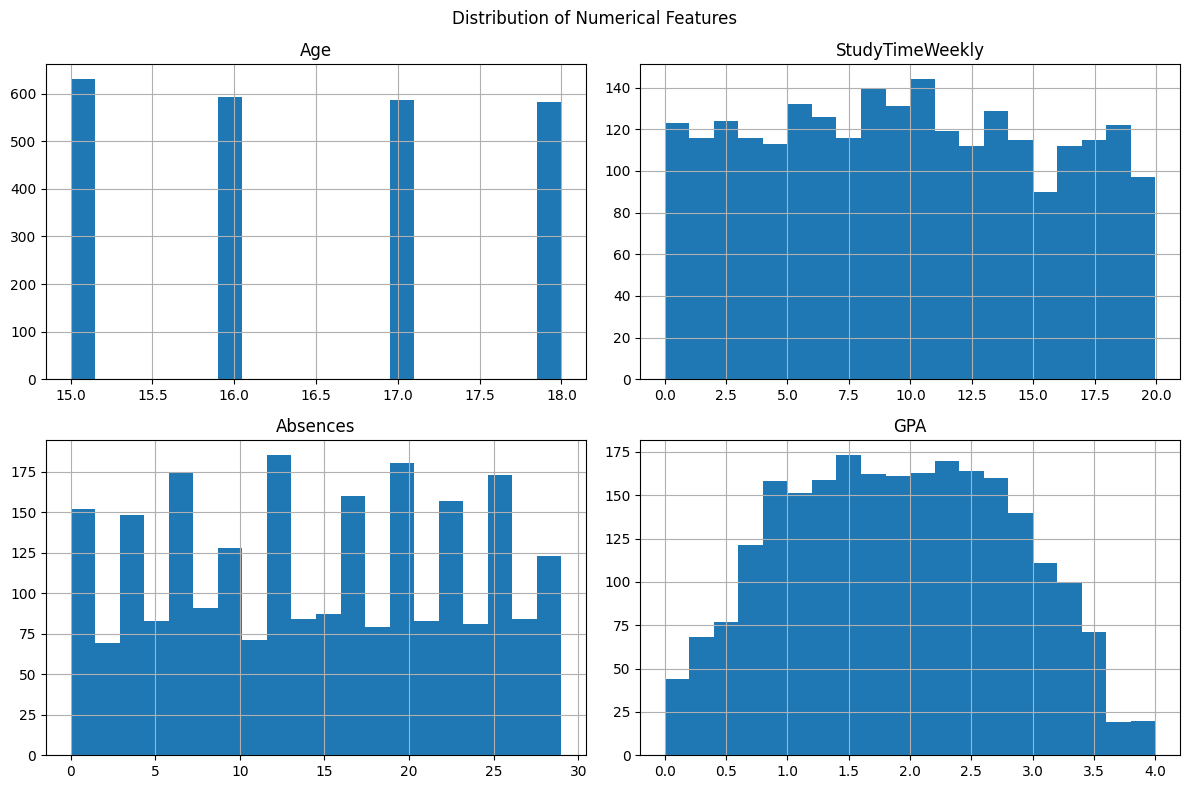

In [5]:
# Histograms for numerical features
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()


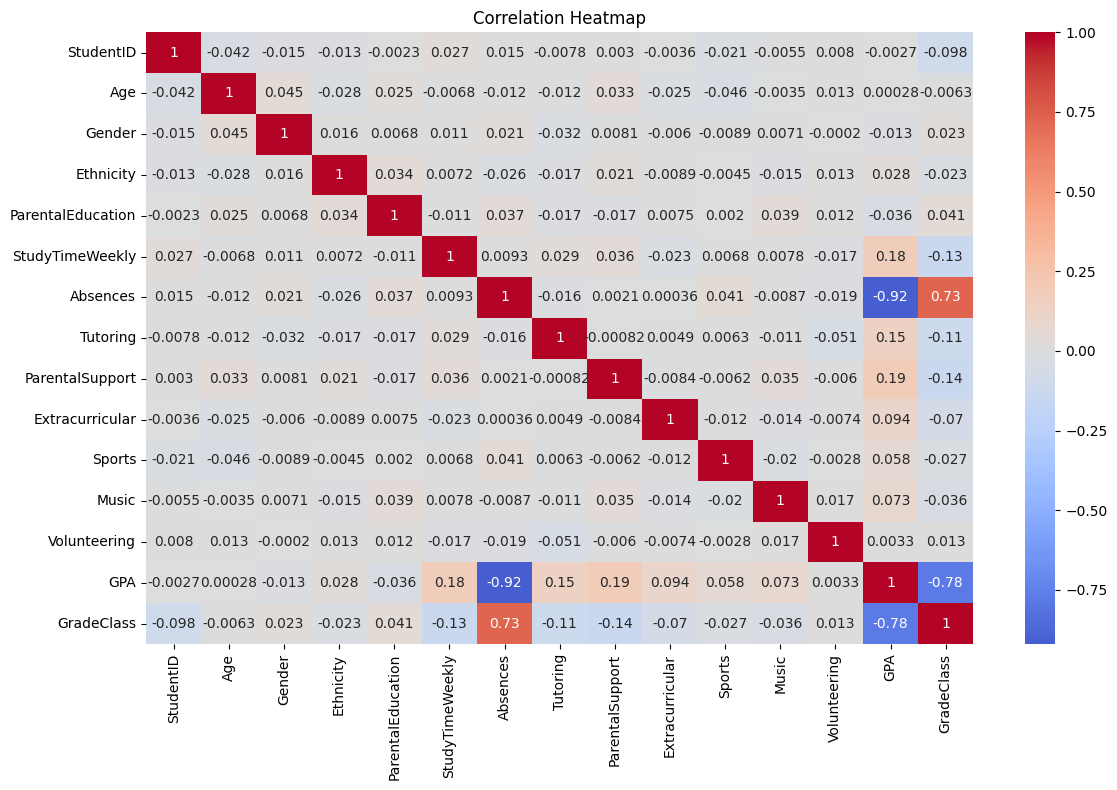

In [6]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

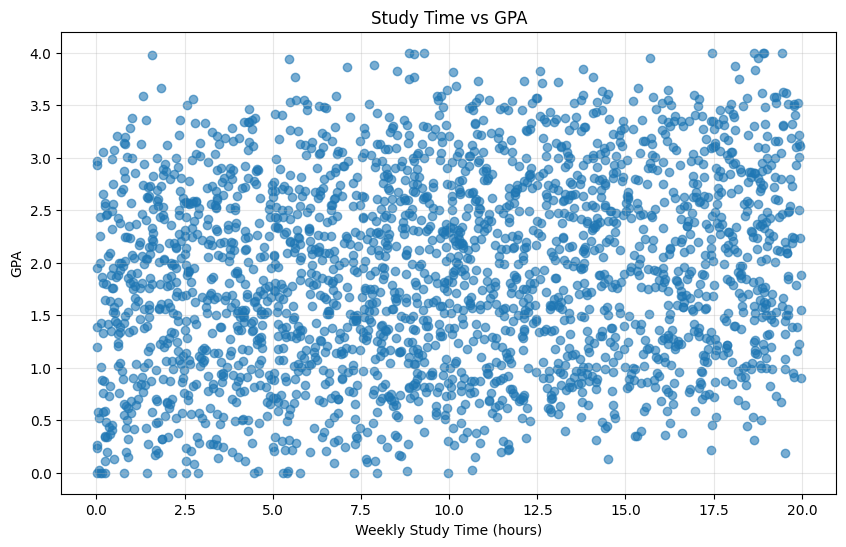

In [7]:
# Scatter plot: Study Time vs GPA
plt.figure(figsize=(10, 6))
plt.scatter(df['StudyTimeWeekly'], df['GPA'], alpha=0.6)
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('GPA')
plt.title('Study Time vs GPA')
plt.grid(True, alpha=0.3)
plt.show()


=== Linear Regression Performance ===
R² Score: 0.9181
Mean Absolute Error: 0.2051
Mean Squared Error: 0.0678
Root Mean Squared Error: 0.2603


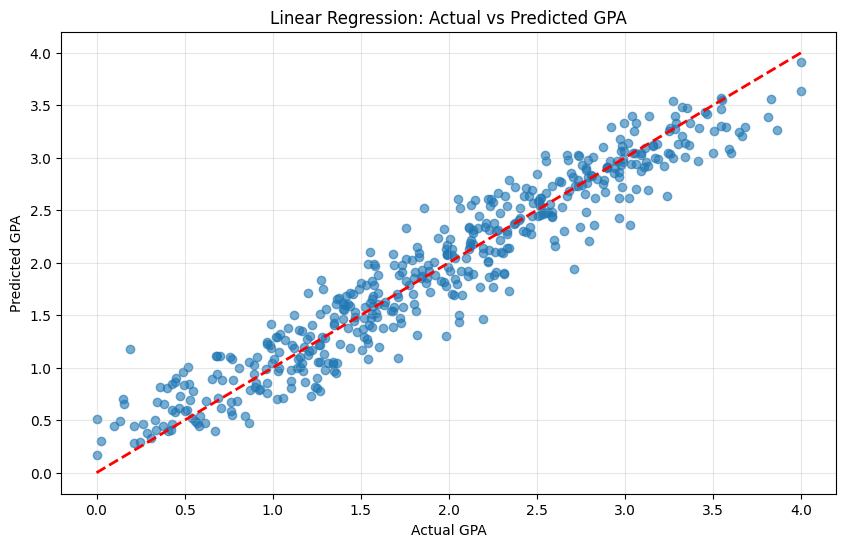

In [8]:
# Prepare data for modeling
# Using multiple features for better prediction
features = ['StudyTimeWeekly', 'Age', 'Absences', 'ParentalEducation', 'ParentalSupport']
X = df[features]
y = df['GPA']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate linear regression model
print("\n=== Linear Regression Performance ===")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Linear Regression: Actual vs Predicted GPA')
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# BONUS: Polynomial Regression
print("\n=== Polynomial Regression (Degree 2) ===")

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate polynomial regression
print(f"R² Score: {r2_score(y_test, y_pred_poly):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_poly):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_poly):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.4f}")


Feature Importance:
             Feature  Coefficient
2           Absences    -0.843136
0    StudyTimeWeekly     0.170004
4    ParentalSupport     0.167456
1                Age    -0.016608
3  ParentalEducation    -0.001243

=== Polynomial Regression (Degree 2) ===
R² Score: 0.9163
Mean Absolute Error: 0.2078
Mean Squared Error: 0.0692
Root Mean Squared Error: 0.2630


In [10]:
# Compare models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (Degree 2)'],
    'R² Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_poly)],
    'MAE': [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_poly)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_poly))]
})

print("\nModel Comparison:")
print(comparison)

# Try different feature combinations
print("\n=== Experimenting with Different Feature Combinations ===")

feature_combinations = [
    ['StudyTimeWeekly'],  # Only study time
    ['StudyTimeWeekly', 'Absences'],  # Study time + absences
    ['StudyTimeWeekly', 'ParentalEducation', 'ParentalSupport'],  # Academic factors
    ['StudyTimeWeekly', 'Age', 'Absences', 'ParentalEducation', 'ParentalSupport']  # All features
]

results = []

for i, features in enumerate(feature_combinations):
    X = df[features]
    y = df['GPA']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Store results
    results.append({
        'Features': ', '.join(features),
        'R²': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    })

# Display results
results_df = pd.DataFrame(results)
print("\nFeature Combination Results:")
print(results_df.sort_values('R²', ascending=False))



Model Comparison:
                              Model  R² Score       MAE      RMSE
0                 Linear Regression  0.918065  0.205098  0.260297
1  Polynomial Regression (Degree 2)  0.916343  0.207755  0.263019

=== Experimenting with Different Feature Combinations ===

Feature Combination Results:
                                            Features        R²       MAE  \
3  StudyTimeWeekly, Age, Absences, ParentalEducat...  0.918065  0.205098   
1                          StudyTimeWeekly, Absences  0.877586  0.254544   
2  StudyTimeWeekly, ParentalEducation, ParentalSu...  0.057013  0.746211   
0                                    StudyTimeWeekly  0.007481  0.762568   

       RMSE  
3  0.260297  
1  0.318164  
2  0.883056  
0  0.905951  


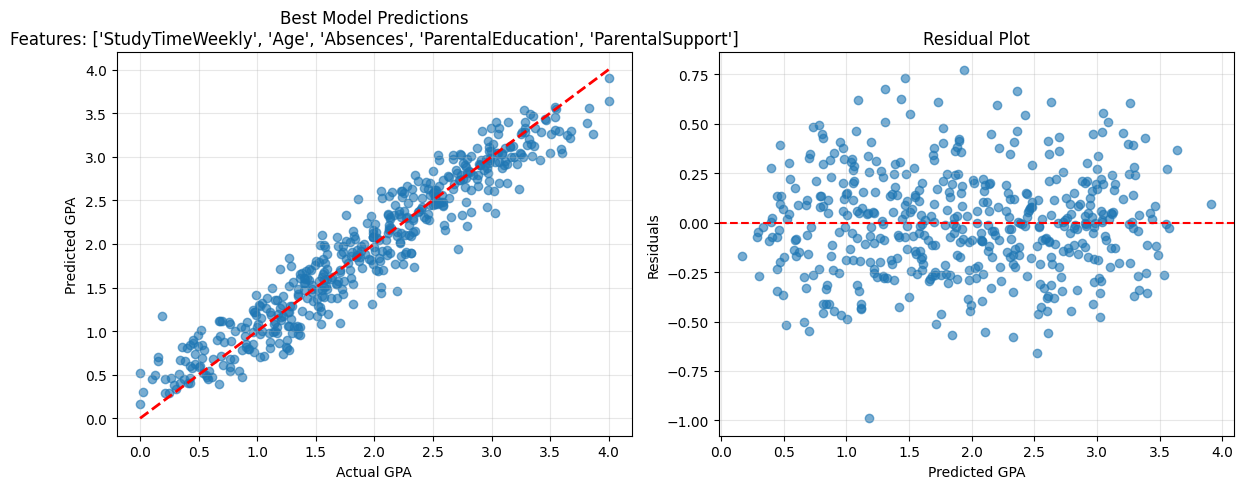


=== Key Insights ===
1. Study time has a positive correlation with GPA
2. Absences have a negative correlation with GPA
3. Parental support and education level also influence academic performance
4. The best model uses multiple features for better prediction accuracy
5. Polynomial regression can capture non-linear relationships but may overfit with small datasets


In [11]:
# Visualize the best model's predictions
best_features = feature_combinations[results_df['R²'].idxmax()]
X_best = df[best_features]
y_best = df['GPA']

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y_best, test_size=0.2, random_state=42)

scaler_best = StandardScaler()
X_train_best_scaled = scaler_best.fit_transform(X_train_best)
X_test_best_scaled = scaler_best.transform(X_test_best)

best_model = LinearRegression()
best_model.fit(X_train_best_scaled, y_train_best)
y_pred_best = best_model.predict(X_test_best_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_best, y_pred_best, alpha=0.6)
plt.plot([y_best.min(), y_best.max()], [y_best.min(), y_best.max()], 'r--', lw=2)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title(f'Best Model Predictions\nFeatures: {best_features}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test_best - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted GPA')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final insights
print("\n=== Key Insights ===")
print("1. Study time has a positive correlation with GPA")
print("2. Absences have a negative correlation with GPA")
print("3. Parental support and education level also influence academic performance")
print("4. The best model uses multiple features for better prediction accuracy")
print("5. Polynomial regression can capture non-linear relationships but may overfit with small datasets")